## Get the Data

Either you can use the uploaded .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file


## Import Statements

Reading the csv file and saving it as dataframe.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names= ['DATES', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head(5)

,DATES,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail(5)

,DATES,TAG,POSTS
2784,2025-04-01 00:00:00,php,314
2785,2025-04-01 00:00:00,python,1986
2786,2025-04-01 00:00:00,r,441
2787,2025-04-01 00:00:00,ruby,34
2788,2025-04-01 00:00:00,swift,242


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
df.shape

(2789, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

,0
DATES,2789
TAG,2789
POSTS,2789


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum()

,DATES,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45084
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407771
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624779
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814181
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52471
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74396
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919764
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2530913
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68333


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [8]:
df.groupby('TAG').count()

,DATES,POSTS
TAG,,
assembly,201,201
c,201,201
c#,202,202
c++,201,201
delphi,201,201
go,186,186
java,201,201
javascript,201,201
perl,201,201


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATES'][1]

'2008-08-01 00:00:00'

In [10]:
df.DATES[1]

'2008-08-01 00:00:00'

In [11]:
type(df['DATES'][1])

str

In [13]:
pd.to_datetime(df['DATES'][1])
type(pd.to_datetime(df['DATES'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.DATES = pd.to_datetime(df.DATES)
df.head(5)

,DATES,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [15]:
reshaped_df = df.pivot(index= 'DATES', columns =  'TAG', values= 'POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
reshaped_df.shape

(202, 14)

In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATES,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,753.0,104.0,NaN,1122.0,630.0,129.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,303.0,1984.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [20]:
reshaped_df.count()

,0
TAG,
assembly,201
c,201
c#,202
c++,201
delphi,201
go,186
java,201
javascript,201
perl,201


The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008)

In [21]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATES,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1639.0,753.0,104.0,0.0,1122.0,630.0,129.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,303.0,1984.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [22]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


Showing java on line chart.

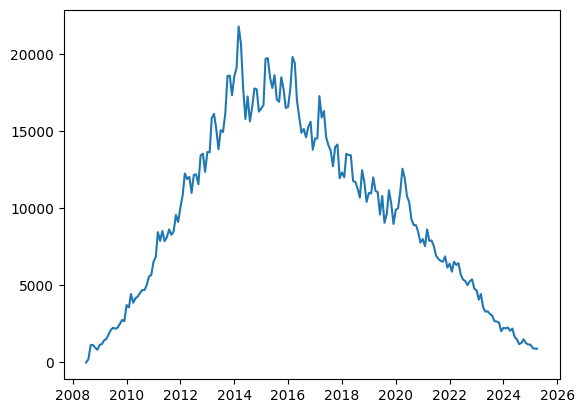

In [26]:
plt.plot(reshaped_df.java)

Showing java and python on line chart.

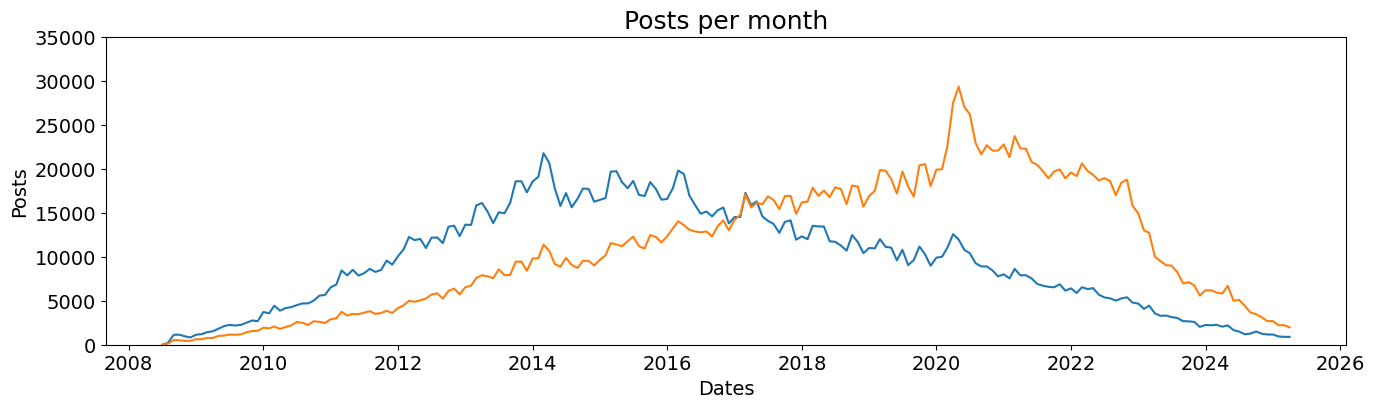

In [37]:
plt.figure(figsize=(16,4))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.title('Posts per month', fontsize=18)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

Showing all languages on line chart.

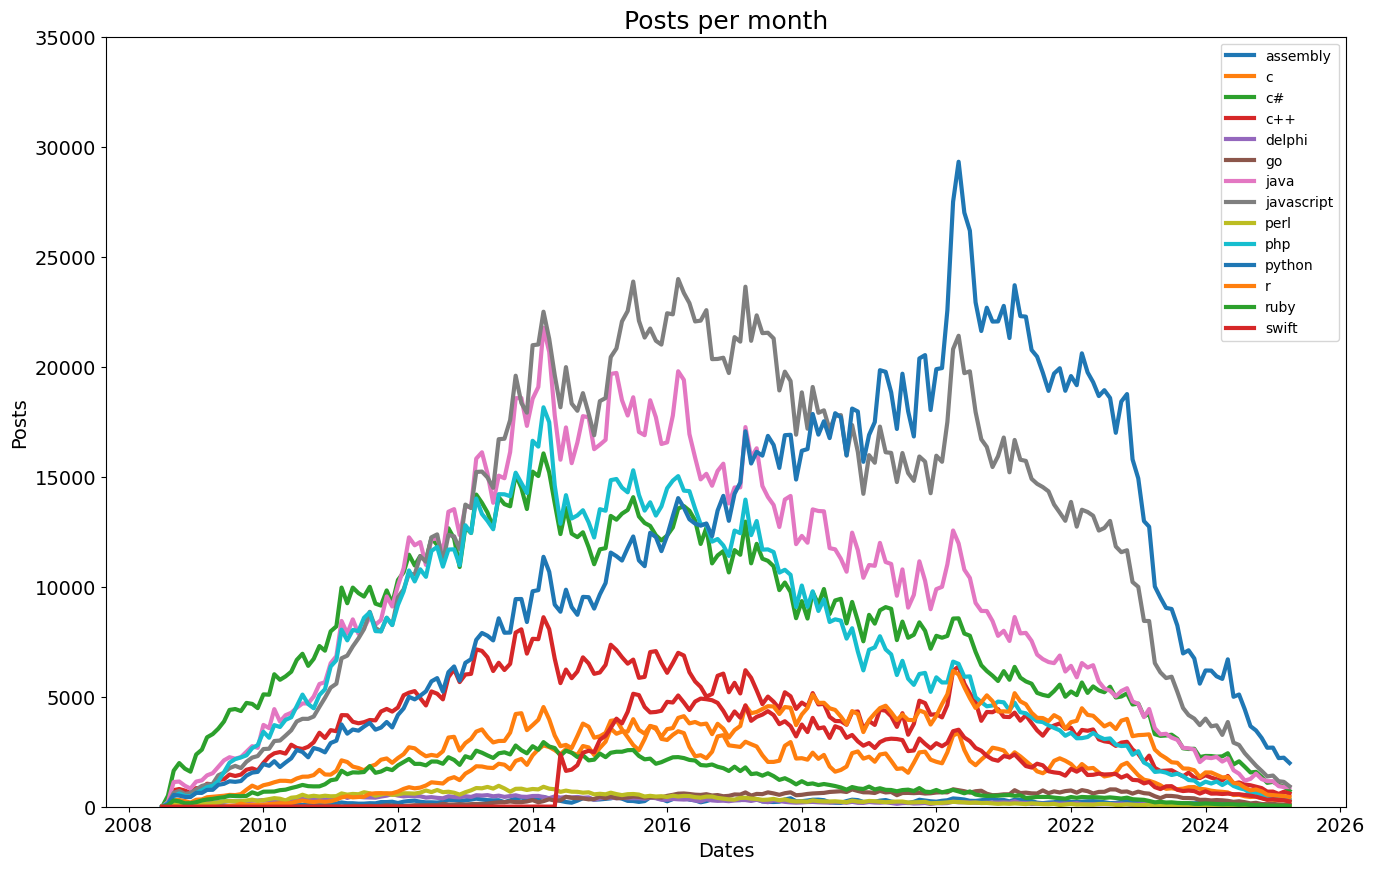

In [42]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.title('Posts per month', fontsize=18)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=column)
plt.legend(fontsize=10)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

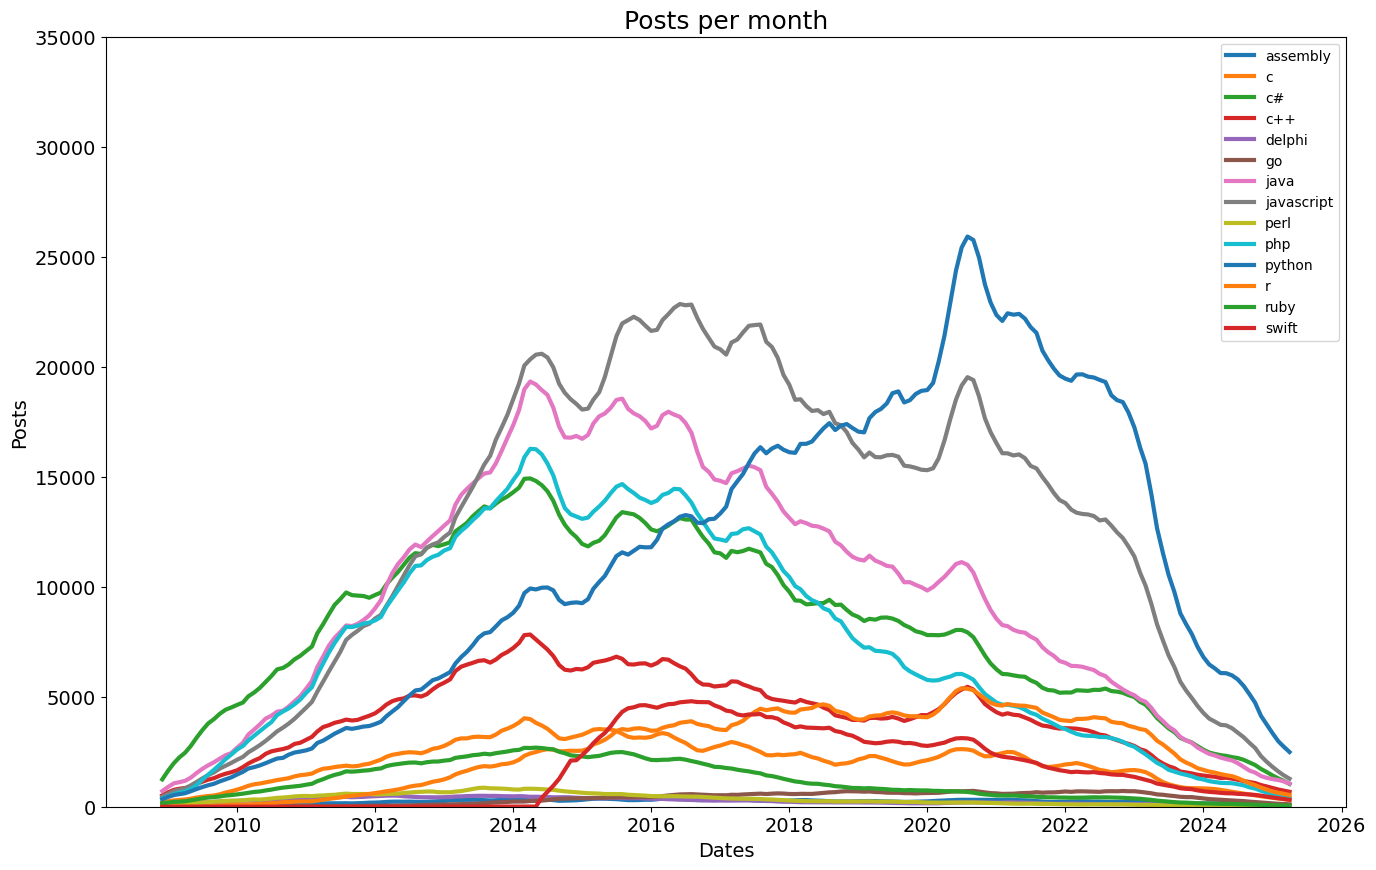

In [43]:
roll_df = reshaped_df.rolling(6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.title('Posts per month', fontsize=18)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)
plt.legend(fontsize=10)

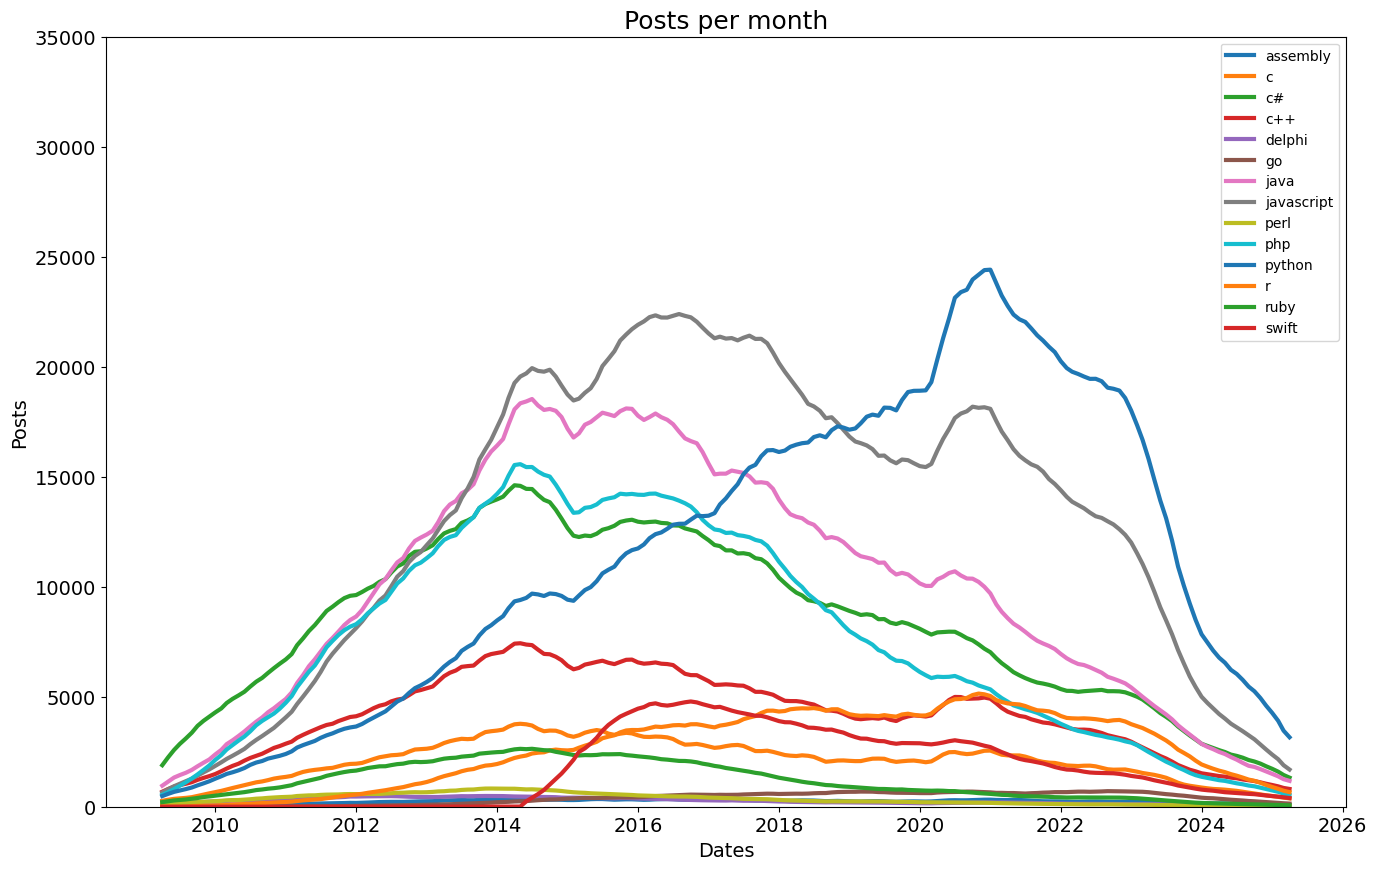

In [44]:
roll_df = reshaped_df.rolling(10).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.title('Posts per month', fontsize=18)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)
plt.legend(fontsize=10)

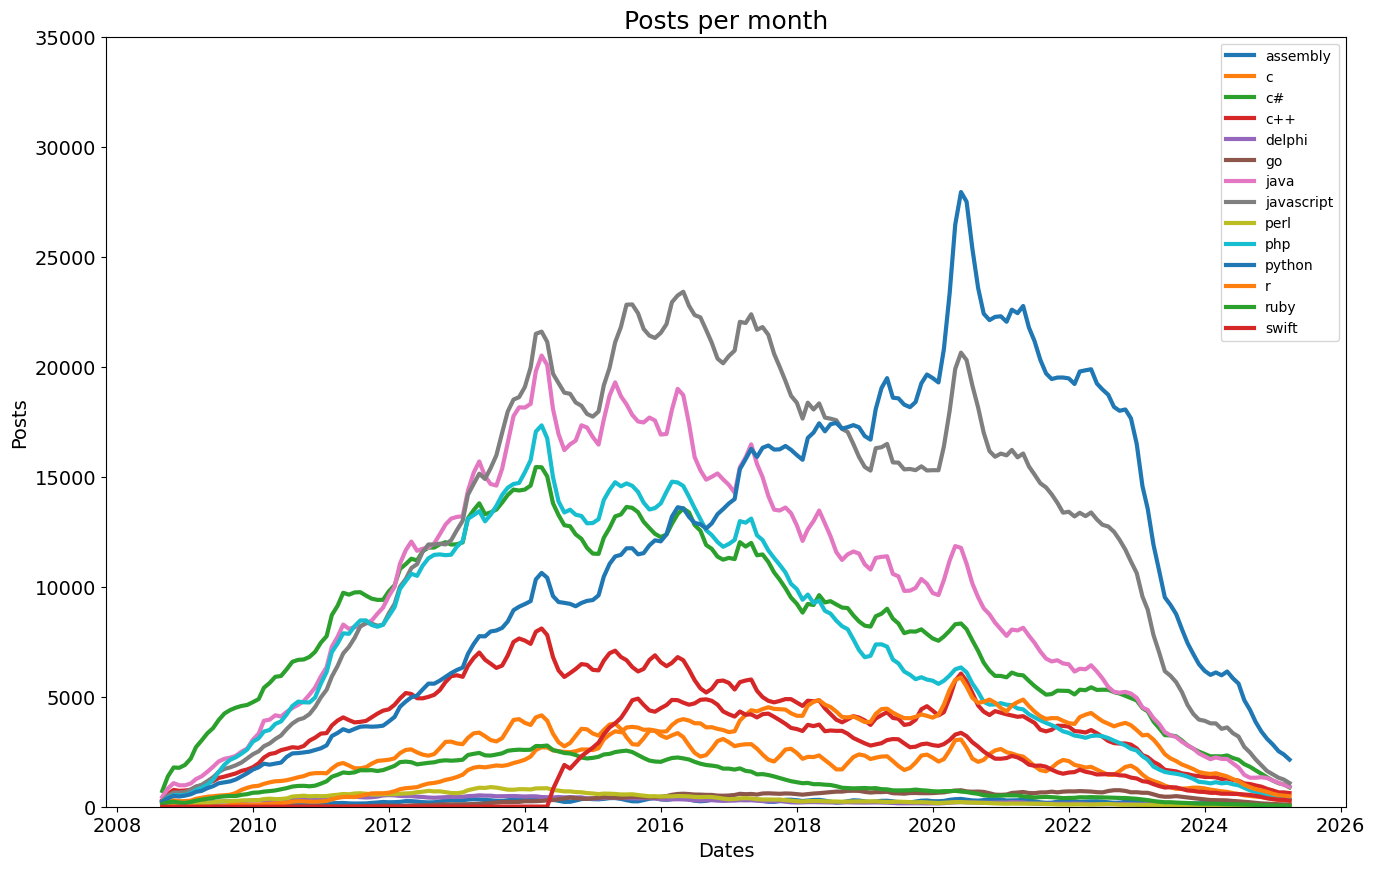

In [45]:
roll_df = reshaped_df.rolling(3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.title('Posts per month', fontsize=18)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)
plt.legend(fontsize=10)